In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.style.use('fivethirtyeight')
np.random.seed(1)

In [3]:
table = pd.read_csv(r"C:\Users\User\Documents\GitHub\Investment_portfolio_optimization\data.csv",
                    parse_dates=["Date"],
                    dayfirst=True
                    ).set_index("Date")

In [3]:
table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-04-30 to 2021-04-28
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMT     504 non-null    float64
 1   BLL     504 non-null    float64
 2   CNC     504 non-null    float64
 3   DG      504 non-null    float64
 4   DLR     504 non-null    float64
 5   EA      504 non-null    float64
 6   EFX     504 non-null    float64
 7   GDX     504 non-null    float64
 8   REGN    504 non-null    float64
 9   SBAC    504 non-null    float64
 10  VFC     504 non-null    float64
 11  VRSN    504 non-null    float64
 12  VRTX    504 non-null    float64
dtypes: float64(13)
memory usage: 55.1 KB


In [4]:
print(table.head())

                   AMT        BLL        CNC          DG         DLR  \
Date                                                                   
2019-04-30  188.208206  58.990601  51.560001  124.093788  109.967674   
2019-05-01  185.904968  57.740715  49.730000  121.859741  109.902275   
2019-05-02  185.798981  59.049652  51.619999  122.656914  110.985970   
2019-05-03  185.943497  60.565262  52.590000  122.725815  112.761009   
2019-05-06  185.201477  60.968769  56.040001  122.391190  111.537178   

                   EA         EFX        GDX        REGN        SBAC  \
Date                                                                   
2019-04-30  94.406990  123.359970  20.635189  343.140015  201.856873   
2019-05-01  94.616447  121.910416  20.269705  340.790008  201.936127   
2019-05-02  94.157631  120.764473  19.923973  335.410004  202.312668   
2019-05-03  92.262505  121.616585  20.042511  336.890015  205.017548   
2019-05-06  93.519272  121.342331  20.052385  344.230011  204.1

In [54]:
global num_assets
num_assets = len(table.columns)
num_assets

13

Text(0, 0.5, 'price in $')

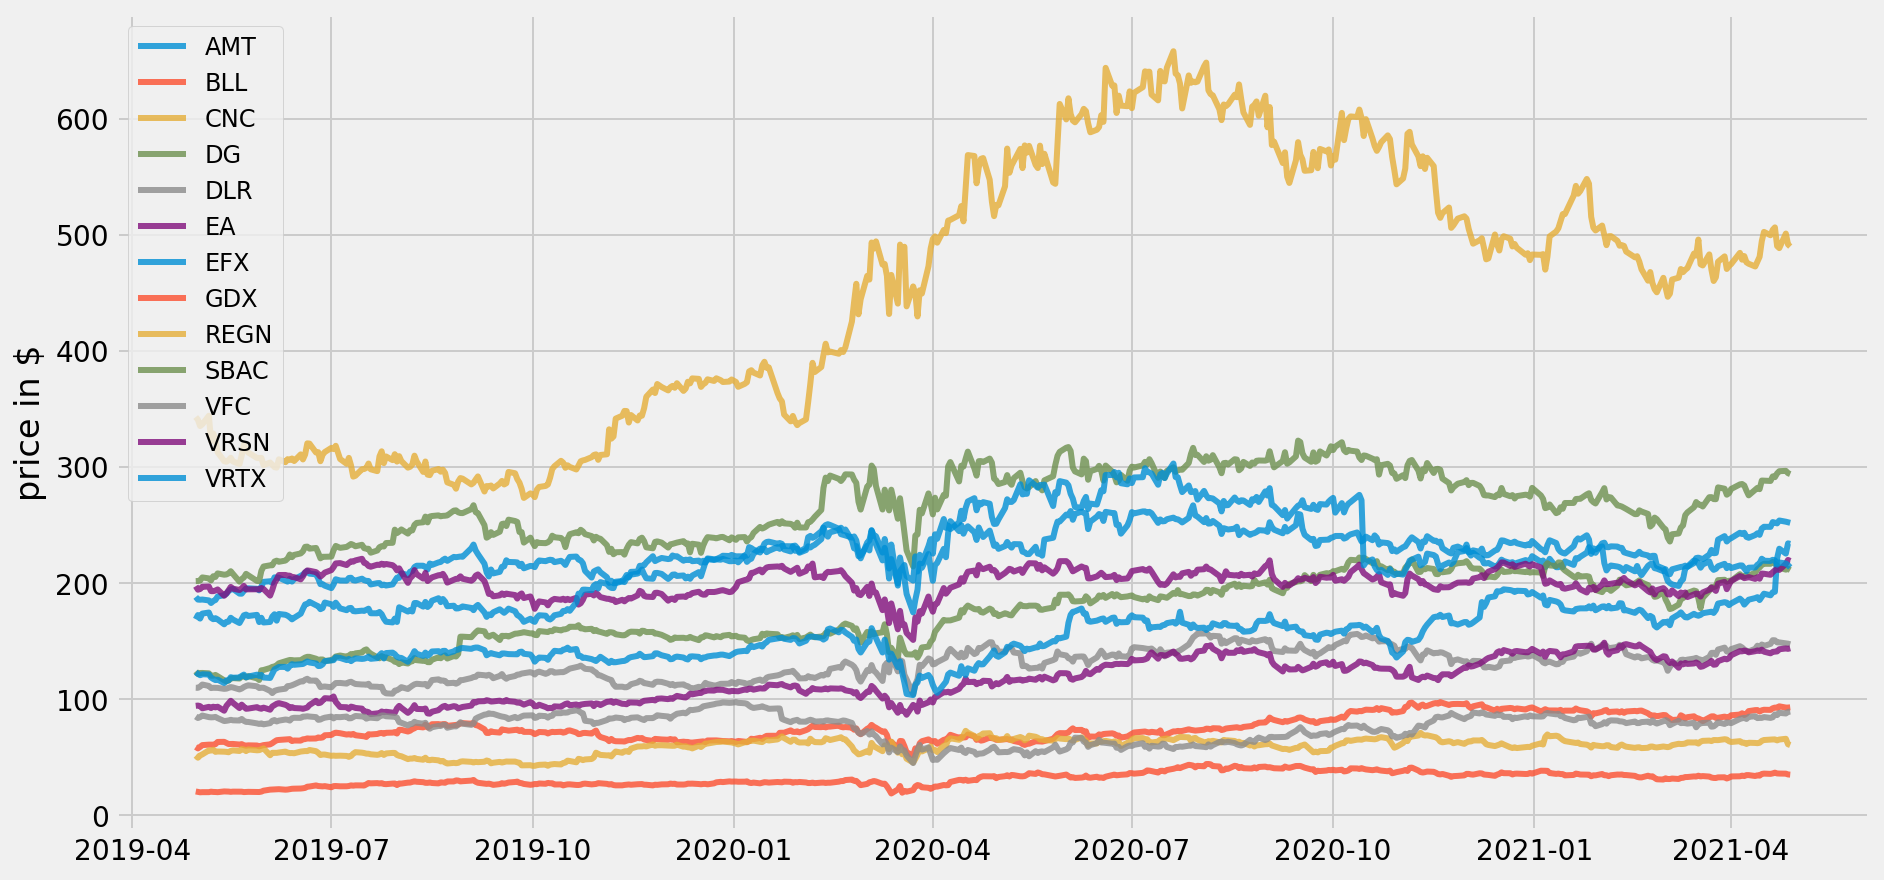

In [5]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

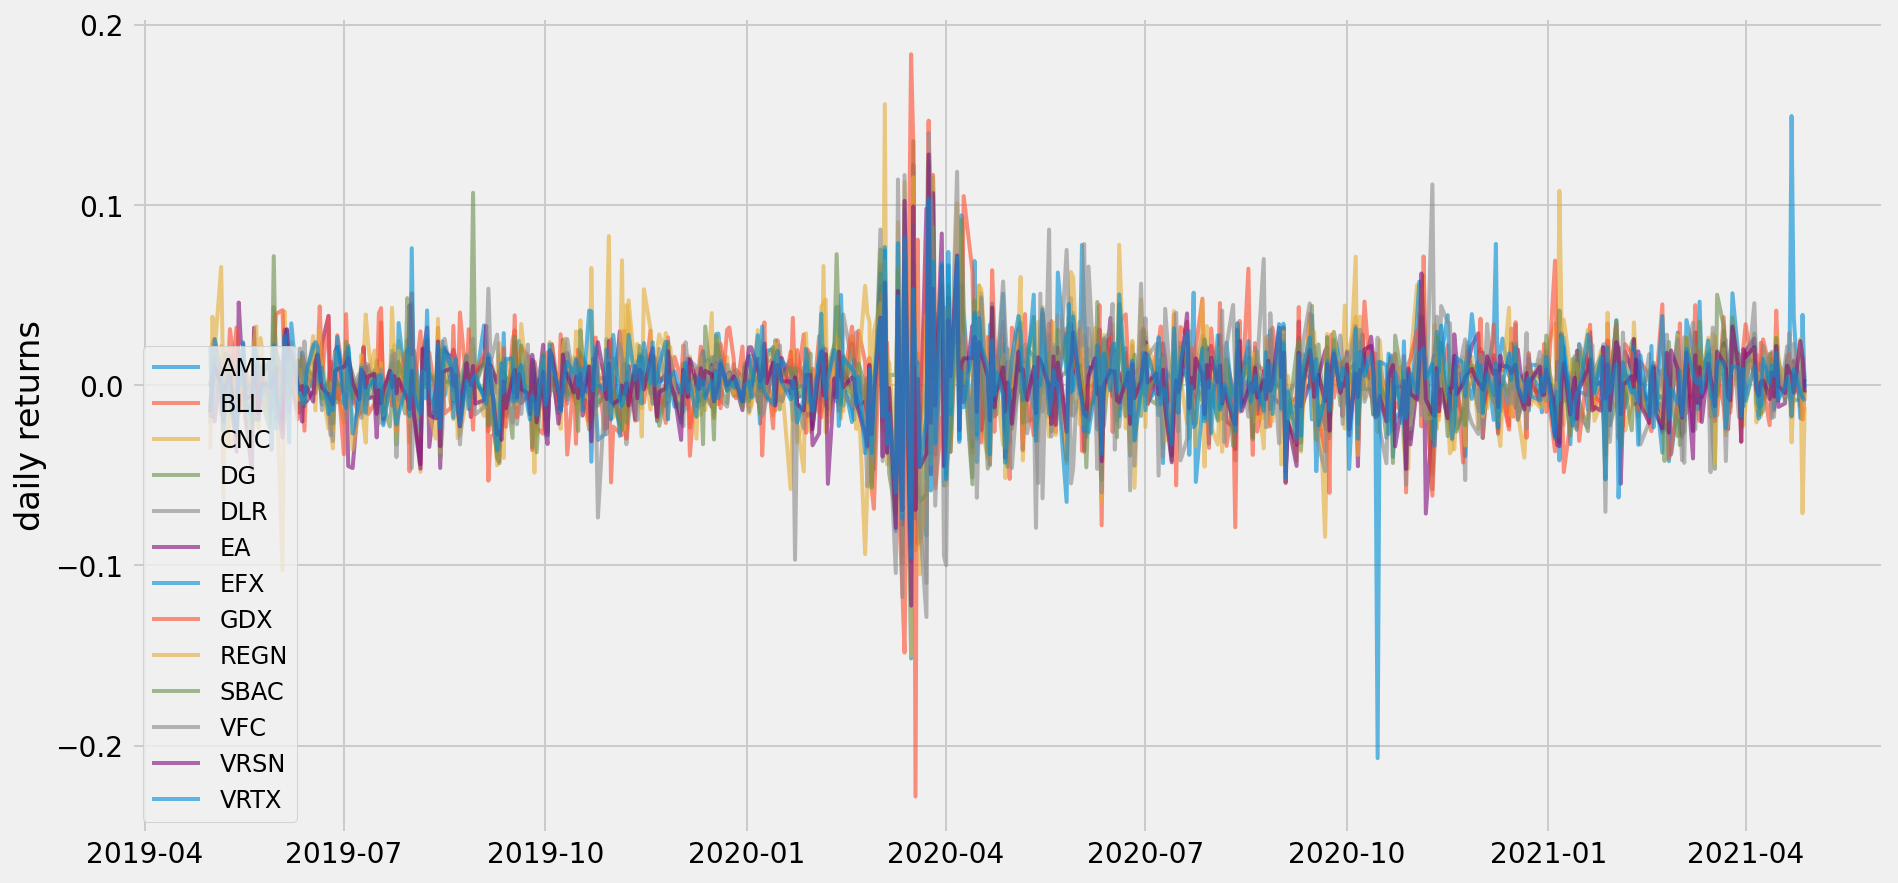

In [52]:
returns = (table - table.shift(1)) / table.shift(1)
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=2, alpha=100,label=c)
plt.legend(loc='lower left', fontsize=12)
plt.ylabel('daily returns')

In [53]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [60]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [4]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 30000
risk_free_rate = 0.0025
cov_matrix

,AMT,BLL,CNC,DG,DLR,EA,EFX,GDX,REGN,SBAC,VFC,VRSN,VRTX
AMT,0.000477,0.000274,0.000277,0.000164,0.000334,0.000169,0.000234,0.000116,0.000187,0.000391,0.000287,0.000284,0.000231
BLL,0.000274,0.000428,0.000218,0.000162,0.000239,0.000132,0.000239,0.000155,0.000149,0.000267,0.000239,0.000233,0.000191
CNC,0.000277,0.000218,0.000804,0.000156,0.000246,0.000171,0.000242,0.000064,0.000204,0.000253,0.000351,0.000267,0.000282
DG,0.000164,0.000162,0.000156,0.000301,0.000151,0.000133,0.000128,0.000088,0.000139,0.000148,0.000130,0.000169,0.000143
DLR,0.000334,0.000239,0.000246,0.000151,0.000460,0.000143,0.000225,0.000040,0.000162,0.000322,0.000229,0.000249,0.000201
EA,0.000169,0.000132,0.000171,0.000133,0.000143,0.000401,0.000152,0.000121,0.000219,0.000165,0.000074,0.000222,0.000208
EFX,0.000234,0.000239,0.000242,0.000128,0.000225,0.000152,0.000492,0.000085,0.000147,0.000231,0.000318,0.000249,0.000179
GDX,0.000116,0.000155,0.000064,0.000088,0.000040,0.000121,0.000085,0.000899,0.000093,0.000137,0.000078,0.000128,0.000109
REGN,0.000187,0.000149,0.000204,0.000139,0.000162,0.000219,0.000147,0.000093,0.000523,0.000202,0.000068,0.000212,0.000306
SBAC,0.000391,0.000267,0.000253,0.000148,0.000322,0.000165,0.000231,0.000137,0.000202,0.000474,0.000223,0.000268,0.000244


In [68]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.22


             AMT   BLL   CNC     DG  DLR     EA    EFX    GDX   REGN  SBAC  \
allocation  1.03  4.09  0.97  17.22  1.8  14.09  16.79  16.69  15.24  6.32   

             VFC  VRSN  VRTX  
allocation  1.51   0.0  4.24  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.27
Annualised Volatility: 0.22


             AMT   BLL   CNC     DG   DLR     EA   EFX    GDX  REGN  SBAC  \
allocation  4.07  5.78  1.39  23.82  2.31  22.42  3.73  14.43  5.49  1.28   

              VFC  VRSN  VRTX  
allocation  11.67   0.0   3.6  


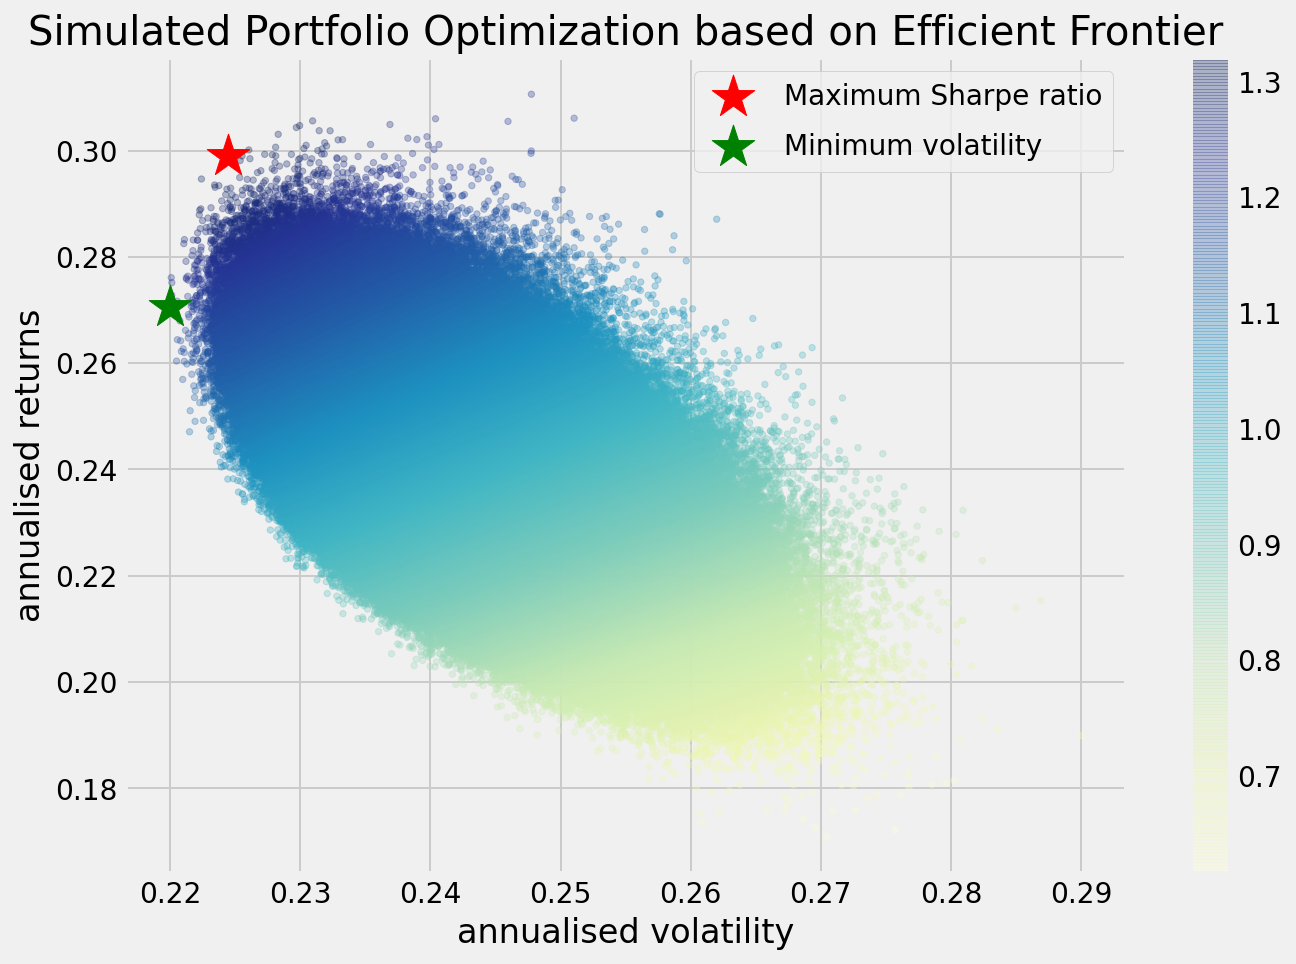

In [69]:
# 300,000 חזרות
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

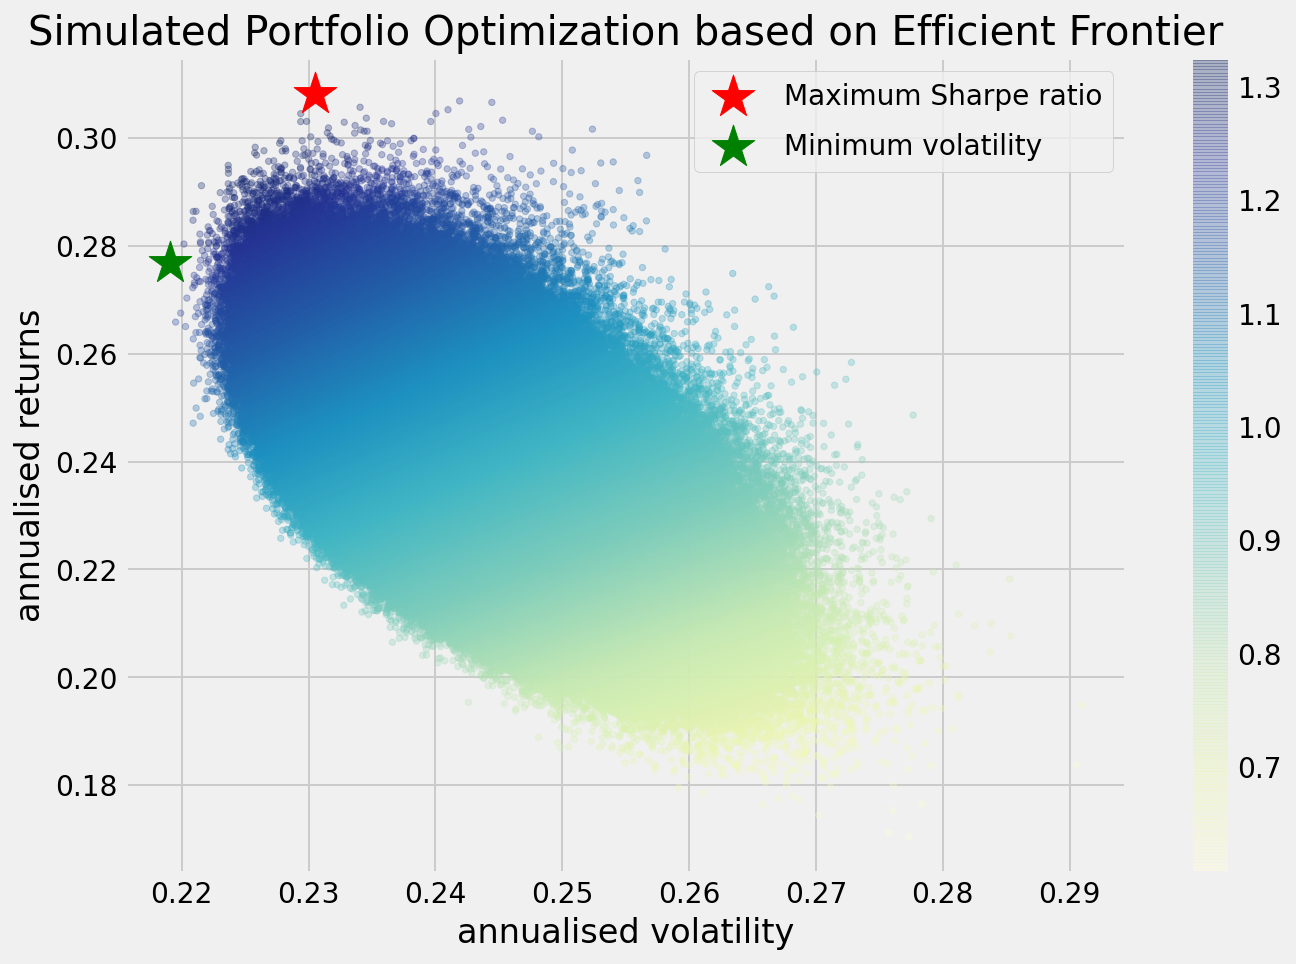

In [66]:
# 3 מיליון חזרות
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [70]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [71]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [72]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [74]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print( "-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print( "Annualised Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Annualised Return:", round(rp_min,2))
    print( "Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    print( "-"*80)
    print( "Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print( txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print( "-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.34
Annualised Volatility: 0.23


            AMT  BLL  CNC     DG  DLR    EA    EFX    GDX  REGN  SBAC  VFC  \
allocation  0.0  0.0  0.0  38.89  0.0  8.66  31.47  18.11  2.87   0.0  0.0   

            VRSN  VRTX  
allocation   0.0   0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.28
Annualised Volatility: 0.22


            AMT   BLL  CNC     DG    DLR     EA   EFX    GDX  REGN  SBAC  \
allocation  0.0  3.82  0.0  31.94  10.07  16.94  7.37  11.54  9.26   0.0   

             VFC  VRSN  VRTX  
allocation  7.05   0.0  2.01  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

AMT : annuaised return 0.21 , annualised volatility: 0.35
BLL : annuaised return 0.28 , annualised vol

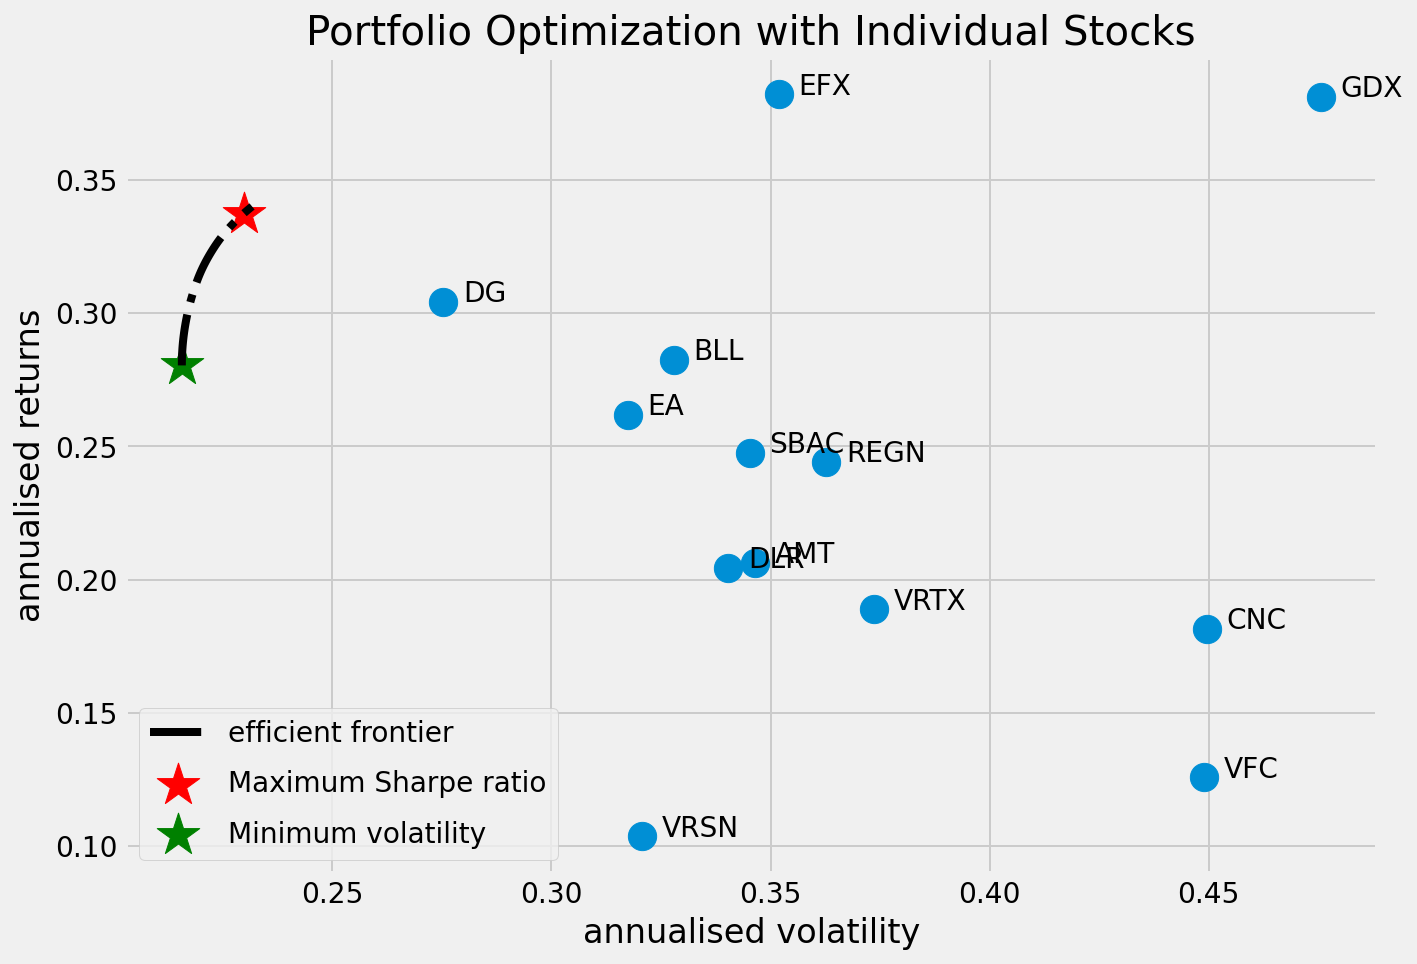

In [75]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)